In [34]:
import pandas as pd
import os
import json
import numpy as np


pd.set_option('display.max_rows', None)


# Input file paths
csv_file = '/home/zarifa/Desktop/papers/RepeatsDB_analysis_of_AF_repeats/strpsearch_vs_afproteome/data/afproteome_plddt.csv'
json_base_path = '/home/zarifa/Desktop/papers/RepeatsDB_analysis_of_AF_repeats/STRPsearch_swissprot_for-analysis/swissprot_filtered_new_format_jsons/pdb'
output_csv_file = '/home/zarifa/Desktop/papers/RepeatsDB_analysis_of_AF_repeats/analysis_results_Zarifa/fuck_plddt.csv'

# Read the input CSV file
df = pd.read_csv(csv_file)


# Get total count of partial IDs
total_count = df['structure_id'].str.split('-').str[1].count()
print(f"Total count of partial IDs: {total_count}")
unique_partial_ids = df['structure_id'].str.split('-').str[1].nunique()
print(f"Number of unique partial IDs: {unique_partial_ids}")

# List to store rows that match the condition
matched_rows = []

# Counter for rows where no match is found
no_match_count = 0

# Iterate through each row in the dataframe
for index, row in df.iterrows():
    # Extract the UniProt accession from the "structure_id" column
    structure_id = row['structure_id']
    partial_id = structure_id.split('-')[1]  # UniProt accession part


    # Determine the folder name from the first two characters of partial_id
    folder_name = partial_id[1:3]

    # Construct the full path to the folder containing .json files
    folder_path = os.path.join(json_base_path, folder_name)
    #print(folder_path)

    # Check if the folder exists
    if not os.path.exists(folder_path):
        print(f"Folder does not exist: {folder_path}")
        continue  # Skip to the next row if folder doesn't exist

    # Construct the expected .json file name
    json_file_name = f"{partial_id}.A.json"
    json_file_path = os.path.join(folder_path, json_file_name)

    # Check if the .json file exists
    if os.path.exists(json_file_path):
        # If it matches, append the row to the matched_rows list
        #print(f"Match found: {json_file_name}")
        matched_rows.append(row)
    else:
        #print(f"No match for {json_file_name}")
        no_match_count += 1


# Create a new DataFrame with the matched rows
output_df = pd.DataFrame(matched_rows)

# Print total number of rows where no match was found
print(f"Total number of unmatched rows: {no_match_count}")

# Write the matched rows to the output CSV file
output_df.to_csv(output_csv_file, index=False, header=True)




Total count of partial IDs: 48142
Number of unique partial IDs: 40149
Folder does not exist: /home/zarifa/Desktop/papers/RepeatsDB_analysis_of_AF_repeats/STRPsearch_swissprot_for-analysis/swissprot_filtered_new_format_jsons/pdb/3F
Total number of unmatched rows: 41430


In [35]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the CSV files
designed_file = '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'

# Load the data
designed_df = pd.read_csv(designed_file)
natural_df = pd.read_csv(natural_file)

# Filter the data where the 'CTFC' column starts with '3.3' in both files
filtered_designed = designed_df[designed_df['CTFC'].astype(str).str.startswith('3.3')]
filtered_natural = natural_df[natural_df['CTFC'].astype(str).str.startswith('3.3')]

# Print the number of rows that start with '3.3' in both files
#num_rows_designed = len(filtered_designed)
num_rows_natural = len(filtered_natural)
#print('-------------------------------')
#print(filtered_natural['CTFC'])

#print(f"Number of rows in designed file with 'CTFC' starting with '3.3': {num_rows_designed}")
#print(f"Number of rows in natural file with 'CTFC' starting with '3.3': {num_rows_natural}")

# Check if data is filtered correctly to avoid empty plots
if not filtered_natural.empty and not filtered_designed.empty:
    # Combine the data to calculate global min and max for normalization
    combined_df = pd.concat([filtered_natural[['twist_sign_mean', 'twist_sign_std']], 
                             filtered_designed[['twist_sign_mean', 'twist_sign_std']]])
    
 # Get global min and max for each column
    min_curv_mean, max_curv_mean = combined_df['twist_sign_mean'].min(), combined_df['twist_sign_mean'].max()
    min_curv_std, max_curv_std = combined_df['twist_sign_std'].min(), combined_df['twist_sign_std'].max()
    
    # Normalize each dataset based on the global min and max values
    filtered_natural['twist_sign_mean'] = (filtered_natural['twist_sign_mean'] - min_curv_mean) / (max_curv_mean - min_curv_mean)
    filtered_natural['twist_sign_std'] = (filtered_natural['twist_sign_std'] - min_curv_std) / (max_curv_std - min_curv_std)
    filtered_designed['twist_sign_mean'] = (filtered_designed['twist_sign_mean'] - min_curv_mean) / (max_curv_mean - min_curv_mean)
    filtered_designed['twist_ssign_td'] = (filtered_designed['twist_sign_std'] - min_curv_std) / (max_curv_std - min_curv_std)
    
    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Natural data (y-axis: 'curv_std', x-axis: 'curv_mean')
    axes[0].scatter(filtered_natural['twist_sign_mean'], filtered_natural['twist_sign_std'], alpha=0.7, color='b')
    axes[0].set_title('Natural STRPs 3.3')
    axes[0].set_xlabel('twist_handedness_mean')
    axes[0].set_ylabel('twist_handedness_std')
    axes[0].grid(False)  # Remove background grid
    axes[0].set_xlim(0, 1)
    axes[0].set_ylim(0, 1)

    # Plot 2: Designed data (y-axis: 'curv_std', x-axis: 'curv_mean')
    axes[1].scatter(filtered_designed['twist_sign_mean'], filtered_designed['twist_sign_std'], alpha=0.7, color='r')
    axes[1].set_title('Designed STRPs 3.3')
    axes[1].set_xlabel('twist_handedness_mean')
    axes[1].set_ylabel('twist_shandedness_std')
    axes[1].grid(False)  # Remove background grid
    axes[1].set_xlim(0, 1)
    axes[1].set_ylim(0, 1)

    # Adjust layout
    plt.tight_layout()

    # Save the figure as a PNG with 300 DPI
    plt.savefig('/home/zarifa/Desktop/geometry_plotting/STRPs_twist_handedness_3_3.png', dpi=300, format='png')

    # Display the plot
    plt.show()
else:
    print("Filtered data is empty. Please check if the 'CTFC' column has values starting with '3.3' in both files.")


FileNotFoundError: [Errno 2] No such file or directory: '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
designed_file = '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'

# Load the data
designed_df = pd.read_csv(designed_file)
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
designed_df.columns = designed_df.columns.str.strip()
natural_df.columns = natural_df.columns.str.strip()

# Filter the data where the 'CTFC' column starts with '3.3' in both files
filtered_designed = designed_df[designed_df['CTFC'].astype(str).str.startswith('3.3')].copy()
filtered_natural = natural_df[natural_df['CTFC'].astype(str).str.startswith('3.3')].copy()

# Print the columns of both DataFrames to verify if 'twist_sign_mean' and 'twist_sign_std' exist
#print("Columns in filtered_natural:", filtered_natural.columns)
#print("Columns in filtered_designed:", filtered_designed.columns)

# Convert columns to numeric, coercing any non-numeric values to NaN
filtered_natural['twist_sign_mean'] = pd.to_numeric(filtered_natural['twist_sign_mean'], errors='coerce')
filtered_natural['pitch_sign_mean'] = pd.to_numeric(filtered_natural['pitch_sign_mean'], errors='coerce')
filtered_designed['twist_sign_mean'] = pd.to_numeric(filtered_designed['twist_sign_mean'], errors='coerce')
filtered_designed['pitch_sign_mean'] = pd.to_numeric(filtered_designed['pitch_sign_mean'], errors='coerce')

# Print row counts after conversion to check for NaN values
print("Rows in filtered_natural before dropna:", len(filtered_natural))
print("Rows in filtered_designed before dropna:", len(filtered_designed))

# Drop rows with NaN values in relevant columns
filtered_natural.dropna(subset=['twist_sign_mean', 'pitch_sign_mean'], inplace=True)
filtered_designed.dropna(subset=['twist_sign_mean', 'pitch_sign_mean'], inplace=True)

# Print row counts after dropping NaN values
print("Rows in filtered_natural after dropna:", len(filtered_natural))
print("Rows in filtered_designed after dropna:", len(filtered_designed))

#print(f"Number of rows in designed file with 'CTFC' starting with '3.3': {num_rows_designed}")
#print(f"Number of rows in natural file with 'CTFC' starting with '3.3': {num_rows_natural}")

# Check if data is filtered correctly to avoid empty plots
if not filtered_natural.empty and not filtered_designed.empty:
    # Find min and max values across both datasets for consistent axis scaling
    combined_df = pd.concat([filtered_natural[['twist_sign_mean', 'pitch_sign_mean']], 
                             filtered_designed[['twist_sign_mean', 'pitch_sign_mean']]])
    
    min_twist_mean, max_twist_mean = combined_df['twist_sign_mean'].min(), combined_df['pitch_sign_mean'].max()
    min_twist_std, max_twist_std = combined_df['twist_sign_mean'].min(), combined_df['pitch_sign_mean'].max()

    # Create a figure with two subplots side by side
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot 1: Natural data
    axes[0].scatter(filtered_natural['twist_sign_mean'], filtered_natural['pitch_sign_mean'], alpha=0.7, color='b')
    axes[0].set_title('Natural STRPs 3.3')
    axes[0].set_xlabel('twist_sign_mean')
    axes[0].set_ylabel('pitch_sign_mean')
    axes[0].grid(False)
    axes[0].set_xlim(min_twist_mean, max_twist_mean)
    axes[0].set_ylim(min_twist_std, max_twist_std)

    # Plot 2: Designed data
    axes[1].scatter(filtered_designed['twist_sign_mean'], filtered_designed['pitch_sign_mean'], alpha=0.7, color='r')
    axes[1].set_title('Designed STRPs 3.3')
    axes[1].set_xlabel('twist_sign_mean')
    axes[1].set_ylabel('pitch_sign_mean')
    axes[1].grid(False)
    axes[1].set_xlim(min_twist_mean, max_twist_mean)
    axes[1].set_ylim(min_twist_std, max_twist_std)

    # Adjust layout
    plt.tight_layout()

    # Save the figure as a PNG with 300 DPI
    plt.savefig('/home/zarifa/Desktop/geometry_plotting/STRPs_twist_pitch_handedness_3_3.png', dpi=300, format='png')

    # Display the plot
    plt.show()
else:
    print("Filtered data is empty. Please check if the 'CTFC' column has values starting with '3.3' in both files.")


In [ ]:
!pip install seaborn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#Calculate KDE (Kernel Density Estimate)
# Calculate global min and max for twist_sign_mean and pitch_sign_mean across both datasets
min_twist = min(filtered_natural['twist_mean'].min(), filtered_designed['twist_mean'].min())
max_twist = max(filtered_natural['twist_mean'].max(), filtered_designed['twist_mean'].max())
min_pitch = min(filtered_natural['curv_mean'].min(), filtered_designed['curv_mean'].min())
max_pitch = max(filtered_natural['curv_mean'].max(), filtered_designed['curv_mean'].max())

# Normalize twist_sign_mean and pitch_sign_mean columns to 0-1 range
filtered_natural['twist_sign_mean'] = (filtered_natural['twist_sign_mean'] - min_twist) / (max_twist - min_twist)
filtered_designed['twist_sign_mean'] = (filtered_designed['twist_sign_mean'] - min_twist) / (max_twist - min_twist)
filtered_natural['pitch_sign_mean'] = (filtered_natural['pitch_sign_mean'] - min_pitch) / (max_pitch - min_pitch)
filtered_designed['pitch_sign_mean'] = (filtered_designed['pitch_sign_mean'] - min_pitch) / (max_pitch - min_pitch)

# Set the same limits for both axes across both plots
x_lim = (-0.5, 1.5)  
y_lim = (0, 3)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Twist Handedness Comparison
sns.kdeplot(filtered_natural['twist_mean'], label='Natural', color='blue', ax=axes[0])
sns.kdeplot(filtered_designed['twist_mean'], label='Designed', color='red', ax=axes[0])
axes[0].set_xlabel('Twist mean')
axes[0].set_ylabel('Density')
axes[0].set_title('Twist Mean Distribution - Natural vs. Designed')
axes[0].legend()
axes[0].set_xlim(x_lim)
axes[0].set_ylim(y_lim)

# Pitch Handedness Comparison
sns.kdeplot(filtered_natural['curv_mean'], label='Natural', color='blue', ax=axes[1])
sns.kdeplot(filtered_designed['curv_mean'], label='Designed', color='red', ax=axes[1])
axes[1].set_xlabel('Curvature mean')
axes[1].set_ylabel('Density')
axes[1].set_title('Curvature Mean Distribution - Natural vs. Designed')
axes[1].legend()
axes[1].set_xlim(x_lim)
axes[1].set_ylim(y_lim)

# Adjust layout
plt.tight_layout()
plt.show

# Save the figure as a PNG with 300 DPI
plt.savefig('/home/zarifa/Desktop/geometry_plotting/STRPs_kdeplot_curvature_mean_all.png', dpi=300, format='png')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


#natural protein distribution by topology
# Load the natural proteins data
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
natural_df.columns = natural_df.columns.str.strip()

# Convert relevant columns to numeric, coercing any non-numeric values to NaN
natural_df['pitch_sign_mean'] = pd.to_numeric(natural_df['pitch_sign_mean'], errors='coerce')
natural_df['pitch_sign_std'] = pd.to_numeric(natural_df['pitch_sign_std'], errors='coerce')
natural_df['CTFC'] = natural_df['CTFC'].astype(str)  # Convert 'CTFC' to string for consistent filtering

# Drop rows with NaN values in 'curv_mean' or 'curv_std'
natural_df.dropna(subset=['pitch_sign_mean', 'pitch_sign_std'], inplace=True)

# Filter out rows where 'CTFC' is NaN, '2.1', or '2.2'
natural_df = natural_df[~natural_df['CTFC'].isin(['nan', '2.1', '2.2'])]

# Extract the first two components of the CTFC value (e.g., "3.3" from "3.3.1.4")
natural_df['CTFC_group'] = natural_df['CTFC'].apply(lambda x: '.'.join(x.split('.')[:2]))

# Calculate global min and max for normalization
min_curv_mean = natural_df['pitch_sign_mean'].min()
max_curv_mean = natural_df['pitch_sign_mean'].max()
min_curv_std = natural_df['pitch_sign_std'].min()
max_curv_std = natural_df['pitch_sign_std'].max()

# Normalize 'curv_mean' and 'curv_std' columns
natural_df['pitch_handedness_mean_normalized'] = (natural_df['pitch_sign_mean'] - min_curv_mean) / (max_curv_mean - min_curv_mean)
natural_df['pitch_handedness_std_normalized'] = (natural_df['pitch_sign_std'] - min_curv_std) / (max_curv_std - min_curv_std)

# Group by the new CTFC_group
groups = natural_df.groupby('CTFC_group')

# Determine the number of subplots needed
num_groups = len(groups)
cols = 4  # Number of columns in the grid
rows = (num_groups + cols - 1) // cols  # Calculate rows based on the number of groups and columns

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to easily index each subplot

# Plot each group in a separate subplot
for i, (name, group) in enumerate(groups):
    axes[i].scatter(group['pitch_handedness_mean_normalized'], group['pitch_handedness_std_normalized'], alpha=0.7, color='k')
    axes[i].set_title(f'Topology: {name}')
    axes[i].set_xlabel('pitch_handedness_mean (normalized)')
    axes[i].set_ylabel('pitch_handedness_std (normalized)')
    axes[i].grid(False)
    axes[i].set_xlim(0, 1.25)  # Set consistent x-axis range
    axes[i].set_ylim(0, 1.20)  # Set consistent y-axis range

# Remove any empty subplots if the number of groups does not perfectly fill the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure as a single PNG file
output_path = '/home/zarifa/Desktop/geometry_plotting/all_topologies_pitch_handedness_normalized.png'
plt.savefig(output_path, dpi=300, format='png')

# Show the figure
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the natural proteins data
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
natural_df.columns = natural_df.columns.str.strip()

# Convert relevant columns to numeric, coercing any non-numeric values to NaN
natural_df['curv_mean'] = pd.to_numeric(natural_df['curv_mean'], errors='coerce')
natural_df['CTFC'] = natural_df['CTFC'].astype(str)  # Convert 'CTFC' to string for consistent filtering

# Drop rows with NaN values in 'pitch_sign_mean' or 'pitch_sign_std'
natural_df.dropna(subset=['curv_mean'], inplace=True)

# Filter out rows where 'CTFC' is NaN, '2.1', or '2.2'
natural_df = natural_df[~natural_df['CTFC'].isin(['nan', '2.1', '2.2'])]
natural_df = natural_df[~natural_df['CTFC'].str.startswith('5')]

# Extract the first two components of the CTFC value (e.g., "3.3" from "3.3.1.4")
natural_df['CTFC_group'] = natural_df['CTFC'].apply(lambda x: '.'.join(x.split('.')[:2]))

# Group by the new CTFC_group
groups = natural_df.groupby('CTFC_group')

# Determine the number of subplots needed
num_groups = len(groups)
cols = 4  # Number of columns in the grid
rows = (num_groups + cols - 1) // cols  # Calculate rows based on the number of groups and columns

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten to easily index each subplot

# Plot each group in a separate subplot as a normalized histogram
for i, (name, group) in enumerate(groups):
    # Calculate frequencies as percentages manually
    counts, bin_edges = np.histogram(group['curv_mean'], bins=15)
    total = counts.sum()
    percentages = (counts / total) * 100  # Convert counts to percentage of total

    # Plot as a bar plot
    axes[i].bar(bin_edges[:-1], percentages, width=np.diff(bin_edges), color='turquoise', alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Topology: {name}')
    axes[i].set_xlabel('curvature mean')
    axes[i].set_ylabel('Frequency (%)')
    axes[i].set_ylim(0, 100)  # Set y-axis to a maximum of 100%

# Remove any empty subplots if the number of groups does not perfectly fill the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save the figure as a single PNG file
output_path = '/home/zarifa/Desktop/geometry_plotting/topologies_3_4_curvature_mean_histogram.png'
plt.savefig(output_path, dpi=300, format='png')

# Show the figure
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as patches

# Load the natural proteins data
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
natural_df.columns = natural_df.columns.str.strip()

# Convert relevant columns to numeric, coercing any non-numeric values to NaN
columns_to_convert = ['curv_mean', 'twist_mean', 'pitch_mean', 'twist_sign_mean', 'pitch_sign_mean']
for col in columns_to_convert:
    natural_df[col] = pd.to_numeric(natural_df[col], errors='coerce')

# Drop rows with NaN values in the columns of interest
natural_df.dropna(subset=columns_to_convert, inplace=True)

# Normalize each column to a range of 0 to 1
scaler = MinMaxScaler()
natural_df[columns_to_convert] = scaler.fit_transform(natural_df[columns_to_convert])

# Function to display Pearson correlation inside the upper triangle
def correlation_pairplot(x, y, **kwargs):
    correlation = np.corrcoef(x, y)[0, 1]  # Pearson correlation
    ax = plt.gca()

    # Remove existing upper triangle scatter plot
    ax.clear()

    # Define a small transparent background rectangle for better readability
    rect = patches.Rectangle(
        (0.35, 0.4), 0.3, 0.2, transform=ax.transAxes,
        color='lightgray', alpha=0.3, zorder=1
    )
    ax.add_patch(rect)

    # Add correlation value in large, bold, black font
    ax.annotate(f'{correlation:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=20, fontweight='bold', color='black', zorder=2)

    # Hide ticks and labels for cleaner look
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')

# Create the pair plot (removing upper triangle scatter plots)
pair_plot = sns.pairplot(
    natural_df[columns_to_convert], 
    diag_kind='kde',  # KDE for diagonal
    plot_kws={'alpha': 0.5}  # Scatter plot settings
)

# Remove upper triangle scatter plots and add correlation values
pair_plot.map_upper(correlation_pairplot)

# Remove top and right borders for a cleaner look
for ax in pair_plot.axes.flatten():
    if ax:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

# Adjust title
plt.suptitle("Correlations Between Normalized Curvature, Twist, and Pitch Metrics", y=1.02, fontsize=16, fontweight='bold')

# Save the plot
output_path = '/home/zarifa/Desktop/geometry_plotting/correlation_natural_pairplot_normalized.png'
plt.savefig(output_path, dpi=300, format='png')

# Show plot
plt.show()

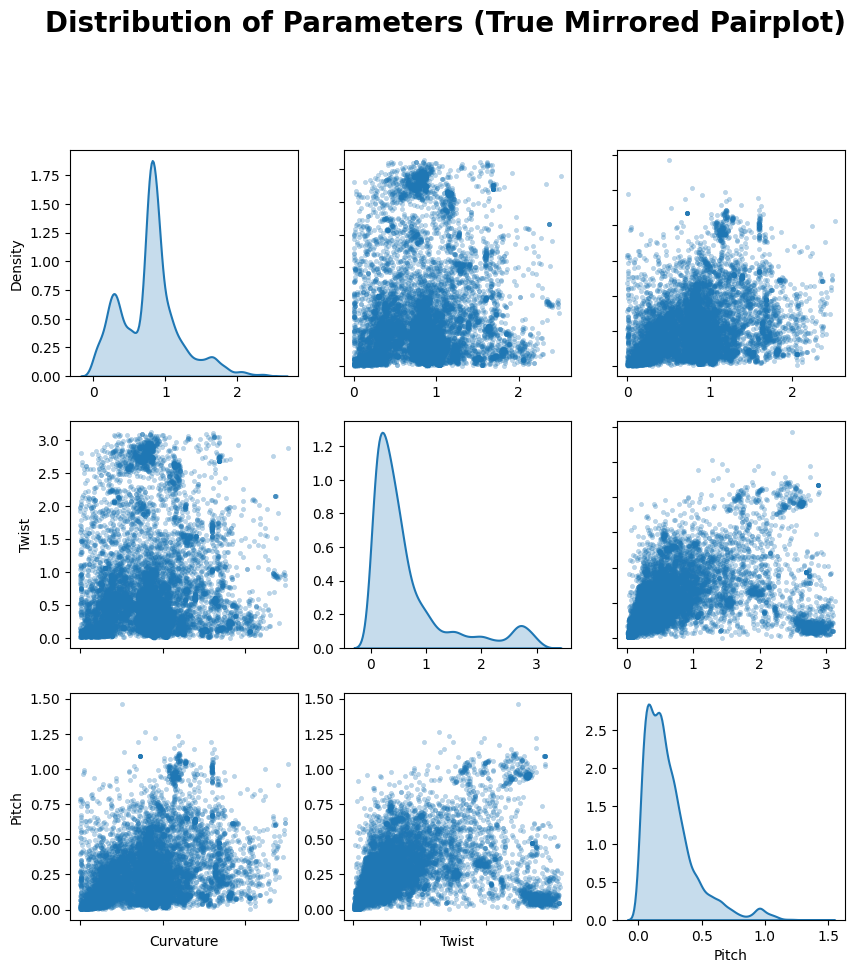

In [21]:
#Distribution of parameters mirror 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Load the natural proteins data
natural_file = '/home/zarifa/Desktop/geometry_plotting/GeomeTRe_output_all.tsv'
natural_df = pd.read_csv(natural_file, sep='\t')

# Strip any whitespace from column names
natural_df.columns = natural_df.columns.str.replace(r'\s+', '', regex=True)

# Define column renaming
column_rename_map = {
    'curv_mean': 'Curvature',
    'twist_mean': 'Twist',
    'pitch_mean': 'Pitch'
}

# Rename columns
natural_df.rename(columns=column_rename_map, inplace=True)

# Convert relevant columns to numeric
columns_to_convert = list(column_rename_map.values())
for col in columns_to_convert:
    natural_df[col] = pd.to_numeric(natural_df[col], errors='coerce')

# Drop NaN values
natural_df.dropna(subset=columns_to_convert, inplace=True)

# Set up the pair plot grid manually
num_vars = len(columns_to_convert)
fig, axes = plt.subplots(num_vars, num_vars, figsize=(10, 10))

# Iterate through variables for scatter plots and histograms
for i, var1 in enumerate(columns_to_convert):
    for j, var2 in enumerate(columns_to_convert):
        
        ax = axes[i, j]
        
        # Diagonal: Histogram
        if i == j:
            sns.histplot(natural_df[var1], bins=50, ax=ax, kde=True)
        
        # Lower triangle: Scatter plot
        elif i > j:
            sns.scatterplot(x=natural_df[var2], y=natural_df[var1], ax=ax, alpha=0.3, s=10, edgecolor=None)
        
        # Upper triangle: Mirror scatter plot from lower triangle
        elif i < j:
            sns.scatterplot(x=natural_df[var1], y=natural_df[var2], ax=ax, alpha=0.3, s=10, edgecolor=None)
        
        # Remove axis labels except on the left and bottom
        if j > 0:
            ax.set_ylabel('')
        if i < num_vars - 1:
            ax.set_xlabel('')
        if i > j:
            ax.set_xticklabels([])
        if i < j:
            ax.set_yticklabels([])

# Adjust layout and title
plt.suptitle("Distribution of Parameters (True Mirrored Pairplot)", y=1.02, fontsize=20, fontweight='bold')

# Save and show the plot
output_path = '/home/zarifa/Desktop/geometry_plotting/distribution_all_manual_pairplot.png'
plt.savefig(output_path, dpi=300, format='png')
plt.show()


/tmp/ipykernel_14692/1911755709.py:87: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.1, hspace=0.1)


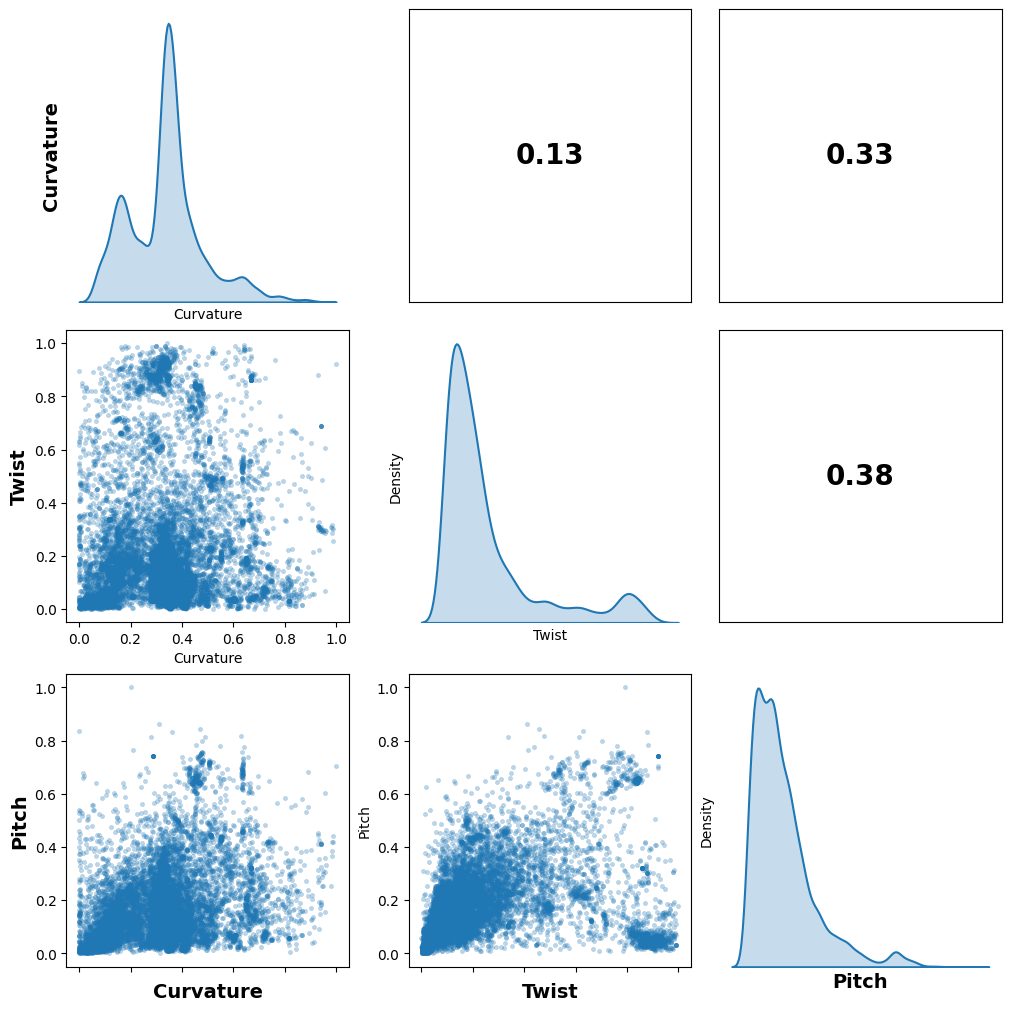

In [49]:
# Distribution of parameters (main figure)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.patches as patches

# Load TSV file with correct tab separator
natural_file = '/home/zarifa/Desktop/geometry_plotting/GeomeTRe_output_all.tsv'
natural_df = pd.read_csv(natural_file, sep='\t')  # FIXED: Explicit tab separator

# Strip whitespace from column names
natural_df.columns = natural_df.columns.str.strip().str.replace(r'\s+', '', regex=True)

# Define column renaming
column_rename_map = {
    'curv_mean': 'Curvature',
    'twist_mean': 'Twist',
    'pitch_mean': 'Pitch'
}

# Rename columns
natural_df.rename(columns=column_rename_map, inplace=True)

# Convert relevant columns to numeric
columns_to_convert = list(column_rename_map.values())
for col in columns_to_convert:
    natural_df[col] = pd.to_numeric(natural_df[col], errors='coerce')

# Drop NaN values
natural_df.dropna(subset=columns_to_convert, inplace=True)

#Normalize each column to range [0, 1]
scaler = MinMaxScaler()
natural_df[columns_to_convert] = scaler.fit_transform(natural_df[columns_to_convert])

# Set up the pair plot grid manually
num_vars = len(columns_to_convert)
fig, axes = plt.subplots(num_vars, num_vars, figsize=(10, 10), constrained_layout=True)

# Iterate through variables for scatter plots and KDE
for i, var1 in enumerate(columns_to_convert):
    for j, var2 in enumerate(columns_to_convert):
        
        ax = axes[i, j]
        
        # Diagonal: KDE for distribution
        if i == j:
            sns.kdeplot(x=natural_df[var1], ax=ax, fill=True, linewidth=1.5)
            ax.set_xticks([])  # Remove ticks
            ax.set_yticks([])  
            ax.set_frame_on(False)  # Remove frame for cleaner look

        # Lower triangle: Scatter plot
        elif i > j:
            sns.scatterplot(x=natural_df[var2], y=natural_df[var1], ax=ax, alpha=0.3, s=10, edgecolor=None)

        # Upper triangle: Remove scatter plots and add correlation values
        elif i < j:
            ax.clear()  # Remove any existing plots
            correlation = np.corrcoef(natural_df[var1], natural_df[var2])[0, 1]  # Compute Pearson correlation
            
            # Add bold, large correlation value
            ax.annotate(f'{correlation:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                        ha='center', va='center', fontsize=20, fontweight='bold', color='black', zorder=2)

            # Remove ticks and labels for a cleaner look
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_xlabel('')
            ax.set_ylabel('')

# Set labels:
# - Remove X-axis labels for the first two columns, keep only the last one
# - Keep all Y-axis labels
for i, var in enumerate(columns_to_convert):
    axes[i, 0].set_ylabel(var, fontsize=14, fontweight='bold')  # Y-axis labels
    if i == num_vars - 1:  # Keep only the last X-axis labels
        for j in range(num_vars):
            axes[-1, j].set_xlabel(columns_to_convert[j], fontsize=14, fontweight='bold')
    else:  # Remove all other X-axis labels
        for j in range(num_vars):
            axes[-1, j].set_xticklabels([])
            axes[-1, j].set_xlabel("")

# Remove extra spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Save and show the plot
output_path = '/home/zarifa/Desktop/geometry_plotting/distribution_all_STRPs_corelation_scaled.png'
plt.savefig(output_path, dpi=300, format='png')
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the natural proteins data
natural_file = '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
natural_df.columns = natural_df.columns.str.strip()

# Convert relevant columns to numeric, coercing any non-numeric values to NaN
columns_to_convert = ['curv_mean', 'twist_mean', 'pitch_mean', 'twist_sign_mean', 'pitch_sign_mean']
for col in columns_to_convert:
    natural_df[col] = pd.to_numeric(natural_df[col], errors='coerce')

# Drop rows with NaN values in the columns of interest
natural_df.dropna(subset=columns_to_convert, inplace=True)

# Calculate the correlation matrix
correlation_matrix = natural_df[columns_to_convert].corr()

# Create a heatmap of the correlation matrix with annotations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlation Coefficient'}, square=True)

# Add a title
plt.title("Pearson Correlation Matrix for Curvature, Twist, and Pitch Metrics")

# Save the heatmap as a PNG file
plt.savefig('/home/zarifa/Desktop/geometry_plotting/correlation_matrix_designed_heatmap.png', dpi=300, format='png')

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Load the natural proteins data
natural_file = '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
natural_df.columns = natural_df.columns.str.strip()

# Convert 'CTFC' column to string for consistent filtering
natural_df['CTFC'] = natural_df['CTFC'].astype(str)

# Filter out rows where 'CTFC' is NaN, '2.1', or '2.2'
natural_df = natural_df[~natural_df['CTFC'].isin(['nan', '2.1', '2.2'])]

# Extract rows where the 'CTFC' value starts with '3.3'
natural_df = natural_df[natural_df['CTFC'].str.startswith('3.3')]

# Extract the first two components of the 'CTFC' value (e.g., "3.3" from "3.3.1.4")
natural_df['CTFC_group'] = natural_df['CTFC'].apply(lambda x: '.'.join(x.split('.')[:2]))

# Convert relevant columns to numeric, coercing any non-numeric values to NaN
columns_to_convert = ['curv_mean', 'twist_mean', 'pitch_mean', 'twist_sign_mean', 'pitch_sign_mean']
for col in columns_to_convert:
    natural_df[col] = pd.to_numeric(natural_df[col], errors='coerce')

# Drop rows with NaN values in the columns of interest
natural_df.dropna(subset=columns_to_convert, inplace=True)

# Normalize each column to a range of 0 to 1
scaler = MinMaxScaler()
natural_df[columns_to_convert] = scaler.fit_transform(natural_df[columns_to_convert])

# Function to display correlation coefficients on the upper triangle
def correlation_pairplot(x, y, **kwargs):
    correlation = np.corrcoef(x, y)[0, 1]
    ax = plt.gca()
    ax.annotate(f'{correlation:.2f}', xy=(0.5, 0.5), xycoords=ax.transAxes,
                ha='center', va='center', fontsize=12,
                color='red' if abs(correlation) > 0.5 else 'black')

# Create the pair plot
pair_plot = sns.pairplot(natural_df[columns_to_convert], diag_kind='kde', plot_kws={'alpha':0.5})
pair_plot.map_upper(correlation_pairplot)

# Save the plot as a PNG file before showing it
plt.suptitle("Correlations between Normalized Curvature, Twist, and Pitch Metrics (CTFC 3.3 Group)", y=1.02)
plt.savefig('/home/zarifa/Desktop/geometry_plotting/correlation_designed_pairplot_normalized_CTFC_3_3.png', dpi=300, format='png')

# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
file_path = '/home/zarifa/Desktop/geometry_plotting/all_repeatparam_geometry.csv'
data = pd.read_csv(file_path)

# Extract the necessary columns
repeatparam_twist = data['Twist_Degrees']
geometryrep_twist_mean = data['Twist_Mean']

# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(repeatparam_twist, geometryrep_twist_mean)

# Display t-test results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Calculate differences and averages for Bland-Altman plot
difference = repeatparam_twist - geometryrep_twist_mean
average = (repeatparam_twist + geometryrep_twist_mean) / 2

# Plot Bland-Altman
plt.figure(figsize=(10, 6))
plt.scatter(average, difference, alpha=0.6)
plt.axhline(difference.mean(), color='red', linestyle='--', label="Mean Difference")
plt.axhline(difference.mean() + 1.96 * difference.std(), color='blue', linestyle='--', label="Upper Limit (Mean + 1.96 SD)")
plt.axhline(difference.mean() - 1.96 * difference.std(), color='blue', linestyle='--', label="Lower Limit (Mean - 1.96 SD)")

# Label the plot
plt.title('Bland-Altman Plot for Twist Parameter Comparison')
plt.xlabel('Average of Twist Parameters (Radians)')
plt.ylabel('Difference between Twist Parameters (Radians)')
plt.legend()
plt.savefig('/home/zarifa/Desktop/geometry_plotting/t-test_BA_lot_all_solenoids.png', dpi=300, format='png')

plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Load the data
file_path = '/home/zarifa/Desktop/geometry_plotting/all_repeatparam_geometry.csv'
data = pd.read_csv(file_path)

# Extract the necessary columns
repeatparam_twist = data['Twist_Degrees']
geometryrep_twist_mean = data['Twist_Mean']

# Perform a non-parametric Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(repeatparam_twist, geometryrep_twist_mean)

# Display Wilcoxon test results
print(f"Wilcoxon statistic: {stat}")
print(f"p-value: {p_value}")

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(geometryrep_twist_mean, repeatparam_twist, alpha=0.6)
plt.plot([geometryrep_twist_mean.min(), geometryrep_twist_mean.max()], 
         [geometryrep_twist_mean.min(), geometryrep_twist_mean.max()], 'r--', label="Identity Line")

# Label the plot
plt.title('Scatter Plot for Twist Parameter Comparison')
plt.xlabel('GeometryRep Twist Mean')
plt.ylabel('RepeatParam Twist Mean')
plt.legend()
plt.savefig('/home/zarifa/Desktop/geometry_plotting/wilcoxon_vector_plot_all_solenoids.png', dpi=300, format='png')

plt.show()


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV files
designed_file = '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'

# Load the data
designed_df = pd.read_csv(designed_file)
natural_df = pd.read_csv(natural_file)

# Strip any whitespace from column names to ensure consistency
designed_df.columns = designed_df.columns.str.strip()
natural_df.columns = natural_df.columns.str.strip()

# Filter the data where the 'CTFC' column starts with '3.3' in both files
filtered_designed = designed_df[designed_df['CTFC'].astype(str).str.startswith('3.3')].copy()
filtered_natural = natural_df[natural_df['CTFC'].astype(str).str.startswith('3.3')].copy()

# Calculate mean curvature for each group
designed_curv_mean = filtered_designed['curv_mean'].mean()
natural_curv_mean = filtered_natural['curv_mean'].mean()

print(f"Mean curvature for designed proteins: {designed_curv_mean}")
print(f"Mean curvature for natural proteins: {natural_curv_mean}")

# Perform a non-parametric Wilcoxon signed-rank test
stat, p_value = stats.wilcoxon(repeatparam_twist, geometryrep_twist_mean)

# Display Wilcoxon test results
print(f"Wilcoxon statistic: {stat}")
print(f"p-value: {p_value}")

# Combine data for plotting
filtered_designed['Type'] = 'Designed'
filtered_natural['Type'] = 'Natural'
combined_df = pd.concat([filtered_designed[['curv_mean', 'Type']], filtered_natural[['curv_mean', 'Type']]])

# Plot
plt.figure(figsize=(10, 6))

# Violin plot
plt.violinplot(dataset=[filtered_natural['curv_mean'], filtered_designed['curv_mean']], showmeans=True)

# Overlay scatter plot of individual data points for each category
# Adding jitter for visibility
np.random.seed(1)  # For reproducibility of jitter
jitter_natural = np.random.normal(1, 0.04, size=len(filtered_natural['curv_mean']))
jitter_designed = np.random.normal(2, 0.04, size=len(filtered_designed['curv_mean']))
plt.scatter(jitter_natural, filtered_natural['curv_mean'], color='blue', alpha=0.6, label='Natural', s=20)
plt.scatter(jitter_designed, filtered_designed['curv_mean'], color='red', alpha=0.6, label='Designed', s=20)

# Customize x-ticks to ensure labels are visible
plt.xticks([1, 2], ['Natural', 'Designed'], fontsize=12)

# Add title and labels
plt.title("Comparison of Curvature Mean Between Natural vs Designed STRPs")
plt.xlabel("Protein Type")
plt.ylabel("Curvature Mean")

# Save the figure as a PNG with 300 DPI
plt.savefig('/home/zarifa/Desktop/geometry_plotting/curvature_comparison_ttest_violin_plot_with_points.png', dpi=300, format='png')

# Show the plot
plt.show()



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV files
designed_file = '/home/zarifa/Desktop/geometry_plotting/designed_c.csv'
natural_file = '/home/zarifa/Desktop/geometry_plotting/natural_rep.csv'

# Load the data
filtered_designed = pd.read_csv(designed_file)
filtered_natural = pd.read_csv(natural_file)

# Calculate global min and max for twist_mean and curv_mean across both datasets
min_twist = min(filtered_natural['twist_mean'].min(), filtered_designed['twist_mean'].min())
max_twist = max(filtered_natural['twist_mean'].max(), filtered_designed['twist_mean'].max())
min_curv = min(filtered_natural['curv_mean'].min(), filtered_designed['curv_mean'].min())
max_curv = max(filtered_natural['curv_mean'].max(), filtered_designed['curv_mean'].max())

# Set the same limits for both axes across both plots without normalizing the data
x_lim = (-0.5, 3)  
y_lim = (0, 3)

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Twist Handedness Comparison
sns.kdeplot(filtered_natural['twist_mean'], label='Natural', color='blue', ax=axes[0])
sns.kdeplot(filtered_designed['twist_mean'], label='Designed', color='red', ax=axes[0])
axes[0].set_xlabel('Twist mean')
axes[0].set_ylabel('Density')
axes[0].set_title('Twist Mean Distribution - Natural vs. Designed')
axes[0].legend()
axes[0].set_xlim(x_lim)
axes[0].set_ylim(y_lim)

# Curvature Handedness Comparison
sns.kdeplot(filtered_natural['curv_mean'], label='Natural', color='blue', ax=axes[1])
sns.kdeplot(filtered_designed['curv_mean'], label='Designed', color='red', ax=axes[1])
axes[1].set_xlabel('Curvature mean')
axes[1].set_ylabel('Density')
axes[1].set_title('Curvature Mean Distribution - Natural vs. Designed')
axes[1].legend()
axes[1].set_xlim(x_lim)
axes[1].set_ylim(y_lim)

# Adjust layout
plt.tight_layout()

# Save the figure as a PNG with 300 DPI
plt.savefig('/home/zarifa/Desktop/geometry_plotting/kdeplot_curvature_twist_mean_all.png', dpi=300, format='png')

# Display the plots
plt.show()


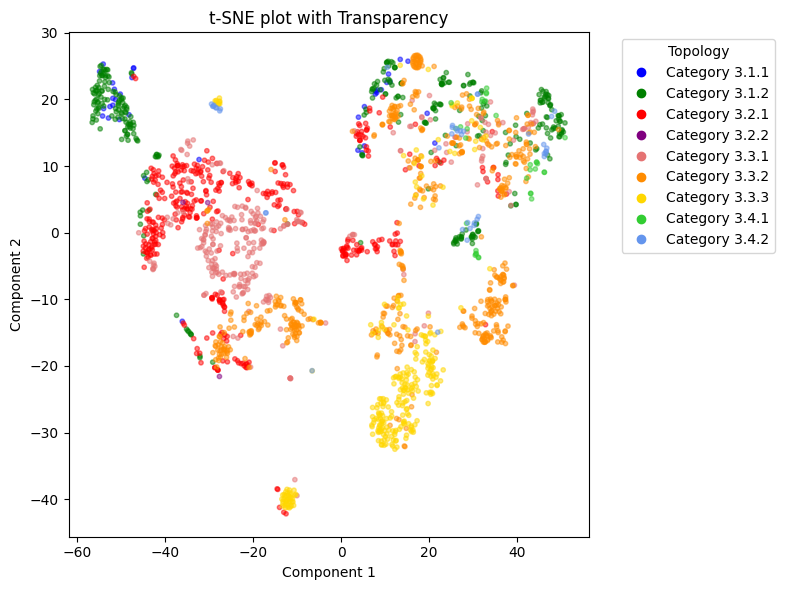

t-SNE results saved to: /home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/t-sne_results_class_3_fold.csv


In [45]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/repeats_v4_geometry_with_class.tsv'
data = pd.read_csv(file_path, sep='\t')

# Step 2: Clean up column names
data.columns = data.columns.str.strip()  # Remove extra whitespace from column names

# Step 3: Create a unique identifier by combining the first two columns
data['id'] = data.iloc[:, 0].astype(str) + '_' + data.iloc[:, 1].astype(str)

categories_to_keep = ['3.1.1', '3.1.2', '3.2.1', '3.2.2', '3.3.1', '3.3.2','3.3.3','3.4.1','3.4.2']  # Adjust these values as needed

# Filter the dataset to include only the desired categories
data = data[data['CTFC'].astype(str).str.startswith(tuple(categories_to_keep))]

# Step 5: Extract the first three characters from the CTFC column
data['CTFC_category'] = data['CTFC'].astype(str).str[:5]  # Take the first three characters

# Step 6: Remove rows with NaN or invalid CTFC values
data = data.dropna(subset=['CTFC'])  # Remove rows where CTFC_category is NaN

# Step 7: Select numerical columns for t-SNE
numerical_columns = [
    "curv_mean", "curv_std", "twist_mean", "twist_std",
    "pitch_mean", "pitch_std"
]
numerical_data = data[numerical_columns]

# Step 8: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Step 9: Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=50, max_iter=3000, random_state=40)  
tsne_result = tsne.fit_transform(normalized_data)

# Step 10: Map unique categories to colors with transparency
#custom_colors = ['blue', 'green', 'red', 'orange']
custom_colors = [
    'blue', 'green', 'red', 'purple',  # Your original colors
    '#E57373',  # Soft Red (Warmer and more visible)
    '#FF8C00',  # Dark Orange
    '#FFD700',  # Golden Yellow (Stronger visibility)
    '#32CD32',  # Lime Green (More contrast)
    '#6495ED'   # Cornflower Blue (More vibrant)
]

# Assign indices to unique categories in a sorted order
unique_categories = sorted(data['CTFC_category'].unique())
category_to_color = {category: custom_colors[i % len(custom_colors)] for i, category in enumerate(unique_categories)}

# Map categories to colors
point_colors = data['CTFC_category'].map(category_to_color)

# Combine t-SNE results with identifiers and categories
tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])
tsne_df['id'] = data['id'].values  # Add identifiers
tsne_df['CTFC_category'] = data['CTFC_category'].values  # Add categories

# Save the t-SNE results for tracking
output_path = '/home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/t-sne_results_class_3_fold.csv'
tsne_df.to_csv(output_path, index=False)

# Step 11: Visualize the t-SNE results with category-based coloring and transparency
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_result[:, 0], tsne_result[:, 1],
    c=point_colors, s=10, alpha=0.5 
)

# Add a legend
handles = [
    plt.Line2D(
        [0], [0],
        marker='o',
        color=color,
        linestyle='',
        label=f"Fold {cat}"
    )
    for cat, color in category_to_color.items()
]

plt.legend(handles=handles, title="Topology", bbox_to_anchor=(1.05, 1), loc='upper left')

# Finalize the plot
plt.title("t-SNE plot with Transparency")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.savefig('/home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/t-sne_results_class_3_fold.png', dpi=300, format='png')
plt.show()

# Output location of saved files
print(f"t-SNE results saved to: {output_path}")


/home/zarifa/.local/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


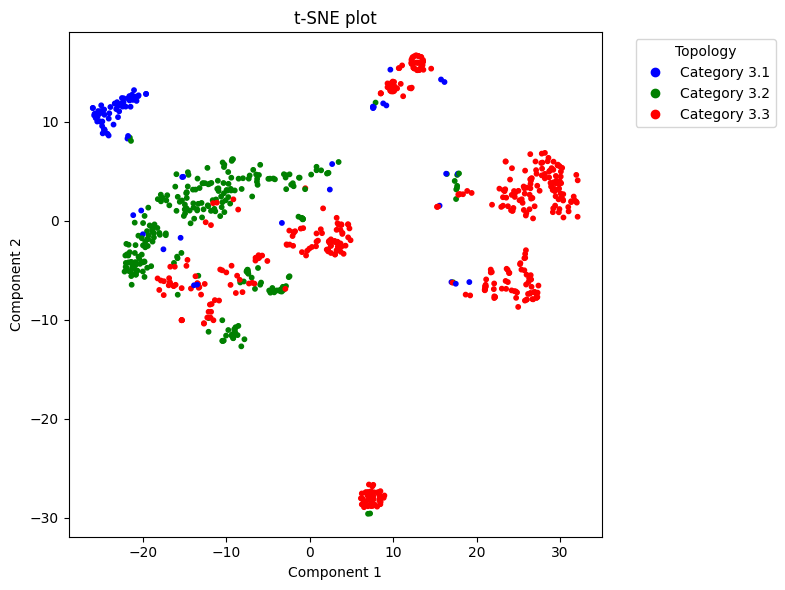

t-SNE results saved to: /home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/t-sne_results_with_ids.csv


In [46]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Load the dataset
file_path = '/home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/rpeatparam_data_Geometry_rep.tsv'
data = pd.read_csv(file_path, sep='\t')

# Step 2: Clean up column names
data.columns = data.columns.str.strip()  # Remove extra whitespace from column names

# Step 3: Add a unique identifier by combining the first two columns
data['id'] = data.iloc[:, 0].astype(str) + '_' + data.iloc[:, 1].astype(str)

# Step 4: Filter out rows where CTFC starts with '2', '4', or '5'
data = data[~data['CTFC'].astype(str).str.startswith(('2', '4', '4', '5'))]

# Step 5: Extract the first three characters from the CTFC column
data['CTFC_category'] = data['CTFC'].astype(str).str[:3]  # Take the first three characters (e.g., "3.2")

# Step 6: Remove rows with NaN or invalid CTFC values
data = data.dropna(subset=['CTFC'])  # Remove rows where CTFC_category is NaN

# Step 7: Select numerical columns for t-SNE
numerical_columns = [
    "curv_mean", "curv_std", "twist_mean", "twist_std",
    "pitch_mean", "pitch_std"
]
numerical_data = data[numerical_columns]

# Step 8: Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)

# Step 9: Apply t-SNE for dimensionality reduction to 2D
tsne = TSNE(n_components=2, perplexity=50, n_iter=3000, random_state=40)
tsne_result = tsne.fit_transform(normalized_data)

# Step 10: Map unique categories to colors
# Define custom colors (blue, green, red, orange, purple)
custom_colors = ['blue', 'green', 'red', 'orange', 'purple']

# Get unique categories and map them to custom colors
unique_categories = sorted(data['CTFC_category'].unique())  # Sort categories for consistency
category_to_color = {category: custom_colors[i % len(custom_colors)] for i, category in enumerate(unique_categories)}

# Assign colors to data points
point_colors = data['CTFC_category'].map(category_to_color)

# Combine t-SNE results with identifiers and categories
tsne_df = pd.DataFrame(tsne_result, columns=['Component 1', 'Component 2'])
tsne_df['id'] = data['id'].values  # Add identifiers
tsne_df['CTFC_category'] = data['CTFC_category'].values  # Add categories

# Save the t-SNE results for tracking
output_path = '/home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/t-sne_results_with_ids.csv'
tsne_df.to_csv(output_path, index=False)

# Step 11: Visualize the t-SNE results with custom colors
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    tsne_df['Component 1'], tsne_df['Component 2'],
    c=point_colors, s=10
)

# Add a legend
handles = [
    plt.Line2D(
        [0], [0],
        marker='o',
        color=color,
        linestyle='',
        label=f"Topology {cat}"
    )
    for cat, color in category_to_color.items()
]
plt.legend(handles=handles, title="Topology", bbox_to_anchor=(1.05, 1), loc='upper left')

# Finalize the plot
plt.title("t-SNE plot")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.savefig('/home/zarifa/Desktop/papers/Geometry/scripts/perfect_and_natural_repeats/t-sne_plot_repeatparam.png', dpi=300, format='png')
plt.show()

# Output location of saved files
print(f"t-SNE results saved to: {output_path}")



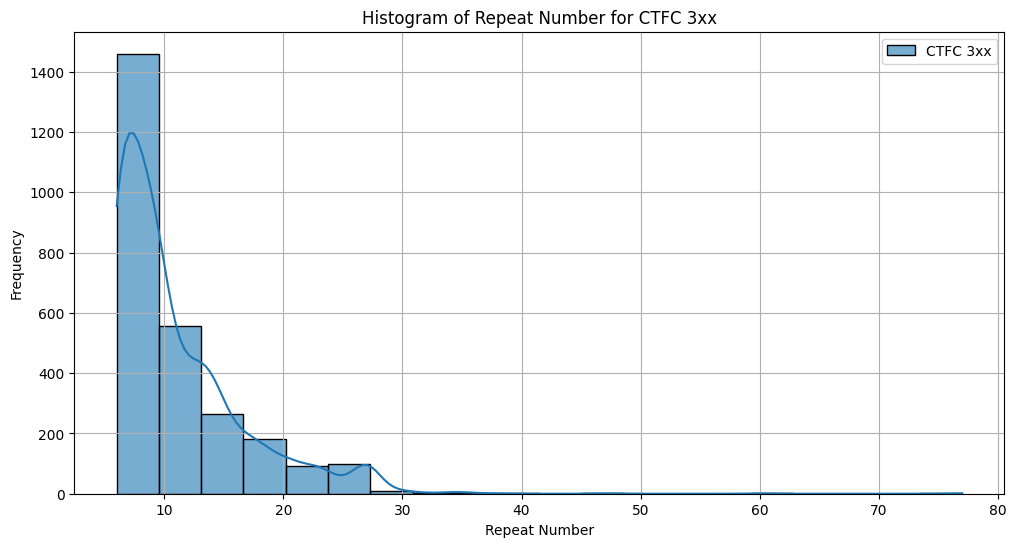

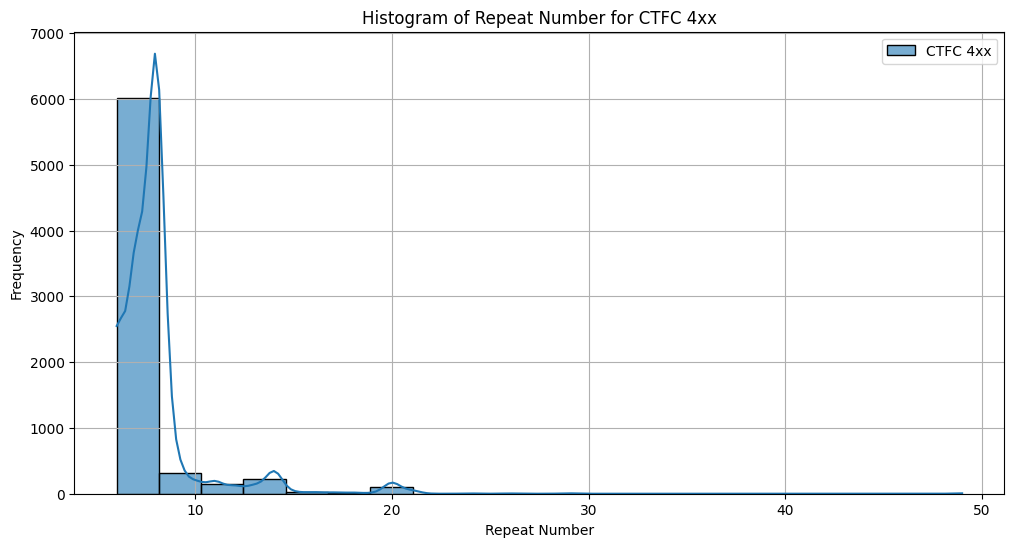

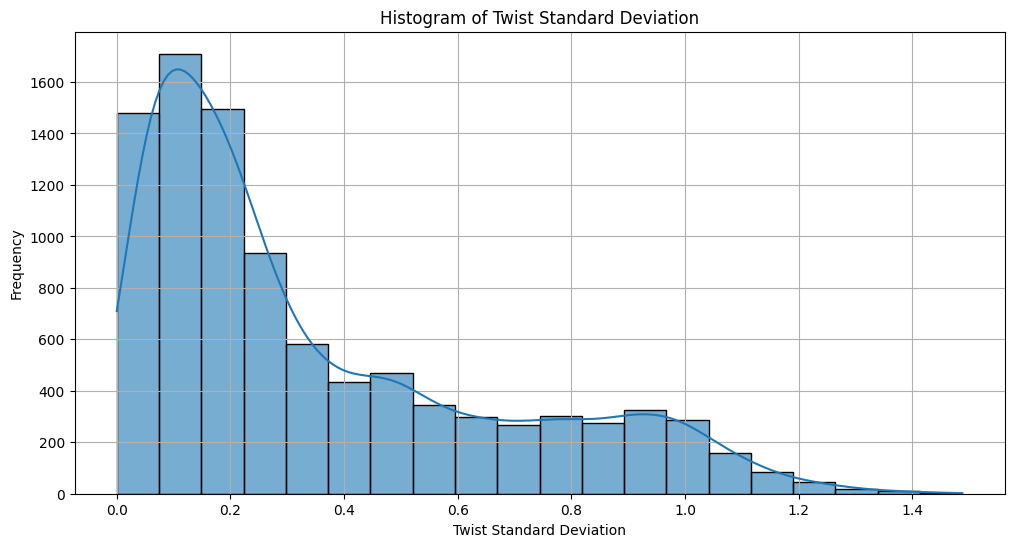

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the filtered dataset
csv_file = "/home/zarifa/Desktop/geometry_plotting/handedness/STRPS_3_4_filtered.csv"
df = pd.read_csv(csv_file)

# Ensure necessary columns are numeric
df["repeat_number"] = pd.to_numeric(df["repeat_number"], errors="coerce")
df["curvature_mean"] = pd.to_numeric(df["curvature_mean"], errors="coerce")
df["twist_std"] = pd.to_numeric(df["twist_std"], errors="coerce")

# Split CTFC_classification into two groups: starting with 3 and 4
df_class_3 = df[df["CTFC_classification"].astype(str).str.startswith("3")]
df_class_4 = df[df["CTFC_classification"].astype(str).str.startswith("4")]

# Histogram for CTFC 3xx
plt.figure(figsize=(12, 6))
sns.histplot(df_class_3["repeat_number"], bins=20, kde=True, label="CTFC 3xx", alpha=0.6)
plt.xlabel("Repeat Number")
plt.ylabel("Frequency")
plt.title("Histogram of Repeat Number for CTFC 3xx")
plt.legend()
plt.grid(True)
plt.show()

# Histogram for CTFC 4xx
plt.figure(figsize=(12, 6))
sns.histplot(df_class_4["repeat_number"], bins=20, kde=True, label="CTFC 4xx", alpha=0.6)
plt.xlabel("Repeat Number")
plt.ylabel("Frequency")
plt.title("Histogram of Repeat Number for CTFC 4xx")
plt.legend()
plt.grid(True)
plt.show()

# Histogram for Twist Standard Deviation
plt.figure(figsize=(12, 6))
sns.histplot(df["twist_std"], bins=20, kde=True, alpha=0.6)
plt.xlabel("Twist Standard Deviation")
plt.ylabel("Frequency")
plt.title("Histogram of Twist Standard Deviation")
plt.grid(True)
plt.show()

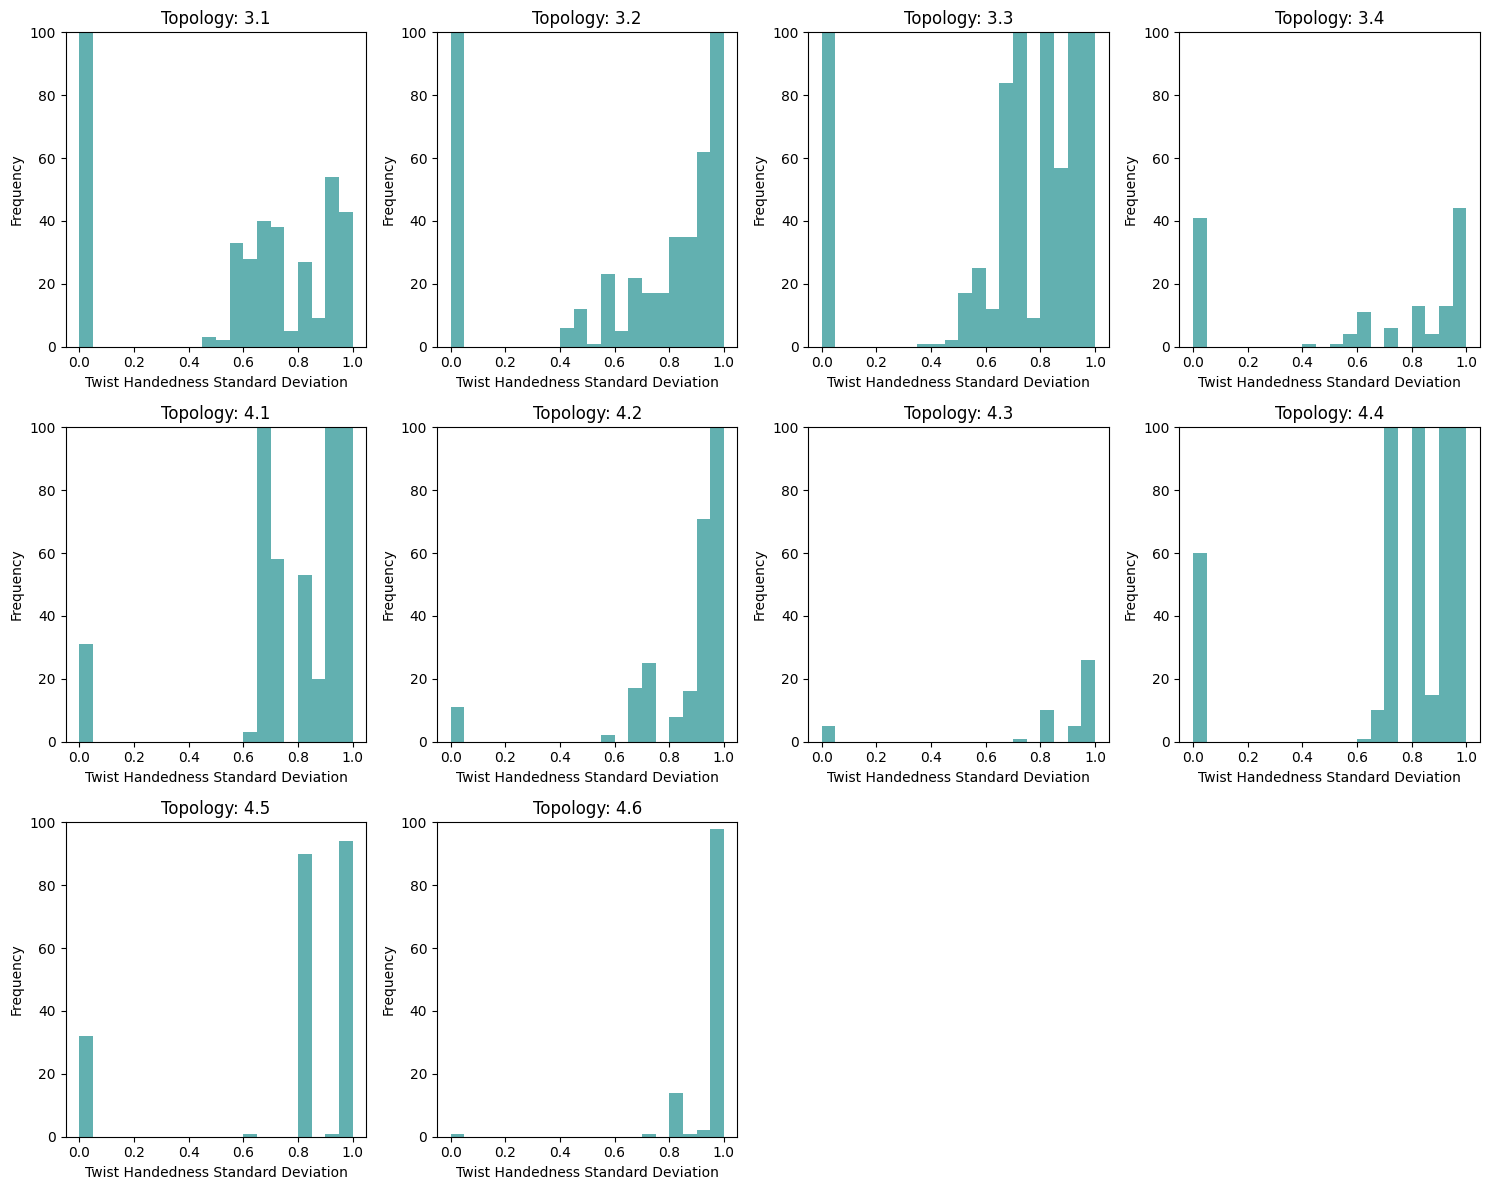

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
natural_file = "/home/zarifa/Desktop/geometry_plotting/handedness/6_unit_output.csv"  
natural_df = pd.read_csv(natural_file)

# Clean column names
natural_df.columns = natural_df.columns.str.strip()

# Convert columns to numeric
natural_df['twist_hand_std'] = pd.to_numeric(natural_df['twist_hand_std'], errors='coerce')
natural_df['CTFC'] = natural_df['CTFC'].astype(str)

# Drop NaN values
natural_df.dropna(subset=['twist_hand_std'], inplace=True)

# Filter for classes starting with "3" or "4"
natural_df = natural_df[natural_df['CTFC'].str.startswith(('3', '4'))]

# Extract first two CTFC components (e.g., "3.3" from "3.3.1.4")
natural_df['CTFC_group'] = natural_df['CTFC'].apply(lambda x: '.'.join(x.split('.')[:2]))

# Group by topology
groups = natural_df.groupby('CTFC_group')

# Set number of plots
num_groups = len(groups)
cols = 4
rows = (num_groups + cols - 1) // cols  

# Create figure
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()

# Plot each histogram
for i, (name, group) in enumerate(groups):
    axes[i].hist(group['twist_hand_std'], bins=20, color='#3B9C9C', alpha=0.8)  # Marine blue
    axes[i].set_title(f'Topology: {name}', fontsize=12)
    axes[i].set_xlabel('Twist Handedness Standard Deviation', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].set_ylim(0, 100)  # **Fix Y-axis scale to 100**
    axes[i].grid(False)

# Remove extra empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()

# Save figure
output_path = "/home/zarifa/Desktop/geometry_plotting/handedness/twist_handedness_std_frequency_by_topology.png"
plt.savefig(output_path, dpi=300, format='png')

# Show the figure
plt.show()
